<h1 style="text-align:center;">Cameron Hicks - Capstone Project Two</h1>
<h1 style="text-align:center;">Hotel Reservation Cancellation Risk Model</h1>
<h2 style="text-align:center;">Exploratory Data Analysis</h2>

## Summary of Exploratory Data Analysis

In this project I explored the data contained in my combined DataFrame for Hotel Bookings with Weather Forecast Data. 

I start by exploring the dataset to view the shape, value counts, data types and other information to get comfortable with the data. Then I moved on to begin visualizing the data. Since the dataset contains a mixture of numeric and categorical data I visualized on histograms and count plots. Then I visualized the data again, comparing each of the two hotels to see if there were major differences between them. It can easily be seen that the two hotels mirror eachother, therefore we can use the total dataset to create one cancellation forecasting model rather than looking at each hotel individually.

After determining we can use the total dataset, I began exploring the correlations. However, to do so I needed to convert the categorical data to numeric data so I could view all features on a heatmap. Due to repeated connection timeouts, I was not able to use pd.get_dummies to encode the data, and had to use a for loop instead. Once a new DataFrame, 'tmp', was created I visualized the correlations on a heatmap. The heatmap was a good overview, but it did not show me what I needed to see, so I zoomed in and created a heat map to see the correlation for each feature to the canceled reservations. I also subset to see the top 20 features that had a positive correlation with my target.

After finding the top 20 correlatinos, I calculated the t-statistic and p-value for each of those features. The results to those calculations showed that all p-values were 0.00000 (or very near 0.00000 with only weather description at 0.00675). This indicated that all of these features show a meaningful difference between canceled vs. non-canceled reservations. The t-statistic results showed a wider range with market segment at 61.250 and weather description at 2.709. From these results I can determine that the features with larger t-statistics are likley stronger predictors for cancellations, however the small t-statistics will be worth keeping as they may still have an impact.

In conclusion, I have created a new DataFrame, 'hotel_EDA_df', with the top 20 features and exported it to a csv file to be used in the next step of this Capstone project.

## Import packages

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

## Import dataset from Data Wrangling

In [2]:
hotel_weather_df = pd.read_csv("hotel_weather_cleaned.csv")

## Inspect Dataset

In [4]:
hotel_weather_df.shape

(87396, 40)

In [26]:
hotel_weather_df['hotel'].value_counts()

hotel
City Hotel      53428
Resort Hotel    33968
Name: count, dtype: int64

In [5]:
hotel_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                            

In [9]:
hotel_weather_df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [11]:
hotel_weather_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
hotel_weather_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,temp_max,temp_min,precip_sum,weathercode
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,...,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567,21.771617,14.416518,1.331814,17.086606
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,...,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946,5.897698,4.451022,4.060968,24.178570
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,9.598000,1.324500,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000,16.648000,10.974500,0.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000,20.798000,14.474500,0.000000,3.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000,26.598000,17.655000,0.200000,51.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,38.774500,26.555000,60.400000,65.000000


In [13]:
num_cols = hotel_weather_df.select_dtypes(include=np.number).columns
cat_cols = hotel_weather_df.select_dtypes(exclude=np.number).columns

In [14]:
hotel_weather_df[num_cols].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,temp_max,temp_min,precip_sum,weathercode
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,...,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567,21.771617,14.416518,1.331814,17.086606
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,...,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946,5.897698,4.451022,4.060968,24.178570
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,9.598000,1.324500,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000,16.648000,10.974500,0.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000,20.798000,14.474500,0.000000,3.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000,26.598000,17.655000,0.200000,51.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,38.774500,26.555000,60.400000,65.000000


In [15]:
hotel_weather_df[cat_cols].describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,hotel_city,arrival_date,forecast_date,weather_description
count,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396
unique,2,12,5,178,8,5,10,12,3,4,3,926,2,793,917,10
top,City Hotel,AUGUST,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-02-14,"Lisbon, Portugal",2017-04-29,2016-03-28,Overcast
freq,53428,11257,67978,27453,51618,69141,56552,46313,86251,71986,63371,211,53428,237,200,32486


In [7]:
hotel_weather_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,hotel_city,arrival_date,forecast_date,temp_max,temp_min,precip_sum,weathercode,weather_description
0,Resort Hotel,0,342,2015,JULY,27,1,0,0,2,...,Check-Out,2015-07-01,"Faro, Portugal",2015-07-01,2015-05-27,26.755,19.305,0.0,0.0,Clear sky
1,Resort Hotel,0,737,2015,JULY,27,1,0,0,2,...,Check-Out,2015-07-01,"Faro, Portugal",2015-07-01,2015-05-27,26.755,19.305,0.0,0.0,Clear sky
2,Resort Hotel,0,7,2015,JULY,27,1,0,1,1,...,Check-Out,2015-07-02,"Faro, Portugal",2015-07-01,2015-05-27,26.755,19.305,0.0,0.0,Clear sky
3,Resort Hotel,0,13,2015,JULY,27,1,0,1,1,...,Check-Out,2015-07-02,"Faro, Portugal",2015-07-01,2015-05-27,26.755,19.305,0.0,0.0,Clear sky
4,Resort Hotel,0,14,2015,JULY,27,1,0,2,2,...,Check-Out,2015-07-03,"Faro, Portugal",2015-07-01,2015-05-27,26.755,19.305,0.0,0.0,Clear sky


In [34]:
resort_df = hotel_weather_df[hotel_weather_df['hotel'] == 'Resort Hotel'].copy()
city_df = hotel_weather_df[hotel_weather_df['hotel'] == 'City Hotel'].copy()

In [36]:
resort_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,hotel_city,arrival_date,forecast_date,temp_max,temp_min,precip_sum,weathercode,weather_description
0,Resort Hotel,0,342,2015,JULY,27,1,0,0,2,...,Check-Out,2015-07-01,"Faro, Portugal",2015-07-01,2015-05-27,26.755,19.305,0.0,0.0,Clear sky
1,Resort Hotel,0,737,2015,JULY,27,1,0,0,2,...,Check-Out,2015-07-01,"Faro, Portugal",2015-07-01,2015-05-27,26.755,19.305,0.0,0.0,Clear sky
2,Resort Hotel,0,7,2015,JULY,27,1,0,1,1,...,Check-Out,2015-07-02,"Faro, Portugal",2015-07-01,2015-05-27,26.755,19.305,0.0,0.0,Clear sky
3,Resort Hotel,0,13,2015,JULY,27,1,0,1,1,...,Check-Out,2015-07-02,"Faro, Portugal",2015-07-01,2015-05-27,26.755,19.305,0.0,0.0,Clear sky
4,Resort Hotel,0,14,2015,JULY,27,1,0,2,2,...,Check-Out,2015-07-03,"Faro, Portugal",2015-07-01,2015-05-27,26.755,19.305,0.0,0.0,Clear sky


In [37]:
city_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,hotel_city,arrival_date,forecast_date,temp_max,temp_min,precip_sum,weathercode,weather_description
25992,City Hotel,0,6,2015,JULY,27,1,0,2,1,...,Check-Out,2015-07-03,"Lisbon, Portugal",2015-07-01,2015-05-27,30.298,17.848,0.0,0.0,Clear sky
25993,City Hotel,0,3,2015,JULY,27,2,0,3,1,...,Check-Out,2015-07-05,"Lisbon, Portugal",2015-07-02,2015-05-28,27.448,17.498,0.0,2.0,Partly cloudy
25994,City Hotel,0,43,2015,JULY,27,3,0,2,2,...,Check-Out,2015-07-05,"Lisbon, Portugal",2015-07-03,2015-05-29,26.398,17.198,0.0,1.0,Mainly clear
25995,City Hotel,0,43,2015,JULY,27,3,0,2,2,...,Check-Out,2015-07-05,"Lisbon, Portugal",2015-07-03,2015-05-29,26.398,17.198,0.0,1.0,Mainly clear
25996,City Hotel,0,4,2015,JULY,27,3,0,2,1,...,Check-Out,2015-07-05,"Lisbon, Portugal",2015-07-03,2015-05-29,26.398,17.198,0.0,1.0,Mainly clear


#### Data Inspection Notes

After inspecting the data we see that there are 87,396 records, 53,428 of the records are for the City Hotel and 33,968 of the records are for the Resort Hotel. Missing and null data seems to have been taken care of in the Data Wrangling process so we should not encounter issues with missing data here. The data frame has information for the arrival dates split between columns, but we also see there is a combined arrival date column saved as a date time object that may be more useful in this data exploration. There are many columns of interest to look into correlation to cancellations including weather_description, temp_min, temp_max, adr, customer_type, agent, distribution_channel, and market_setment.

## Feature Exploration

### Visualize Features of total dataset

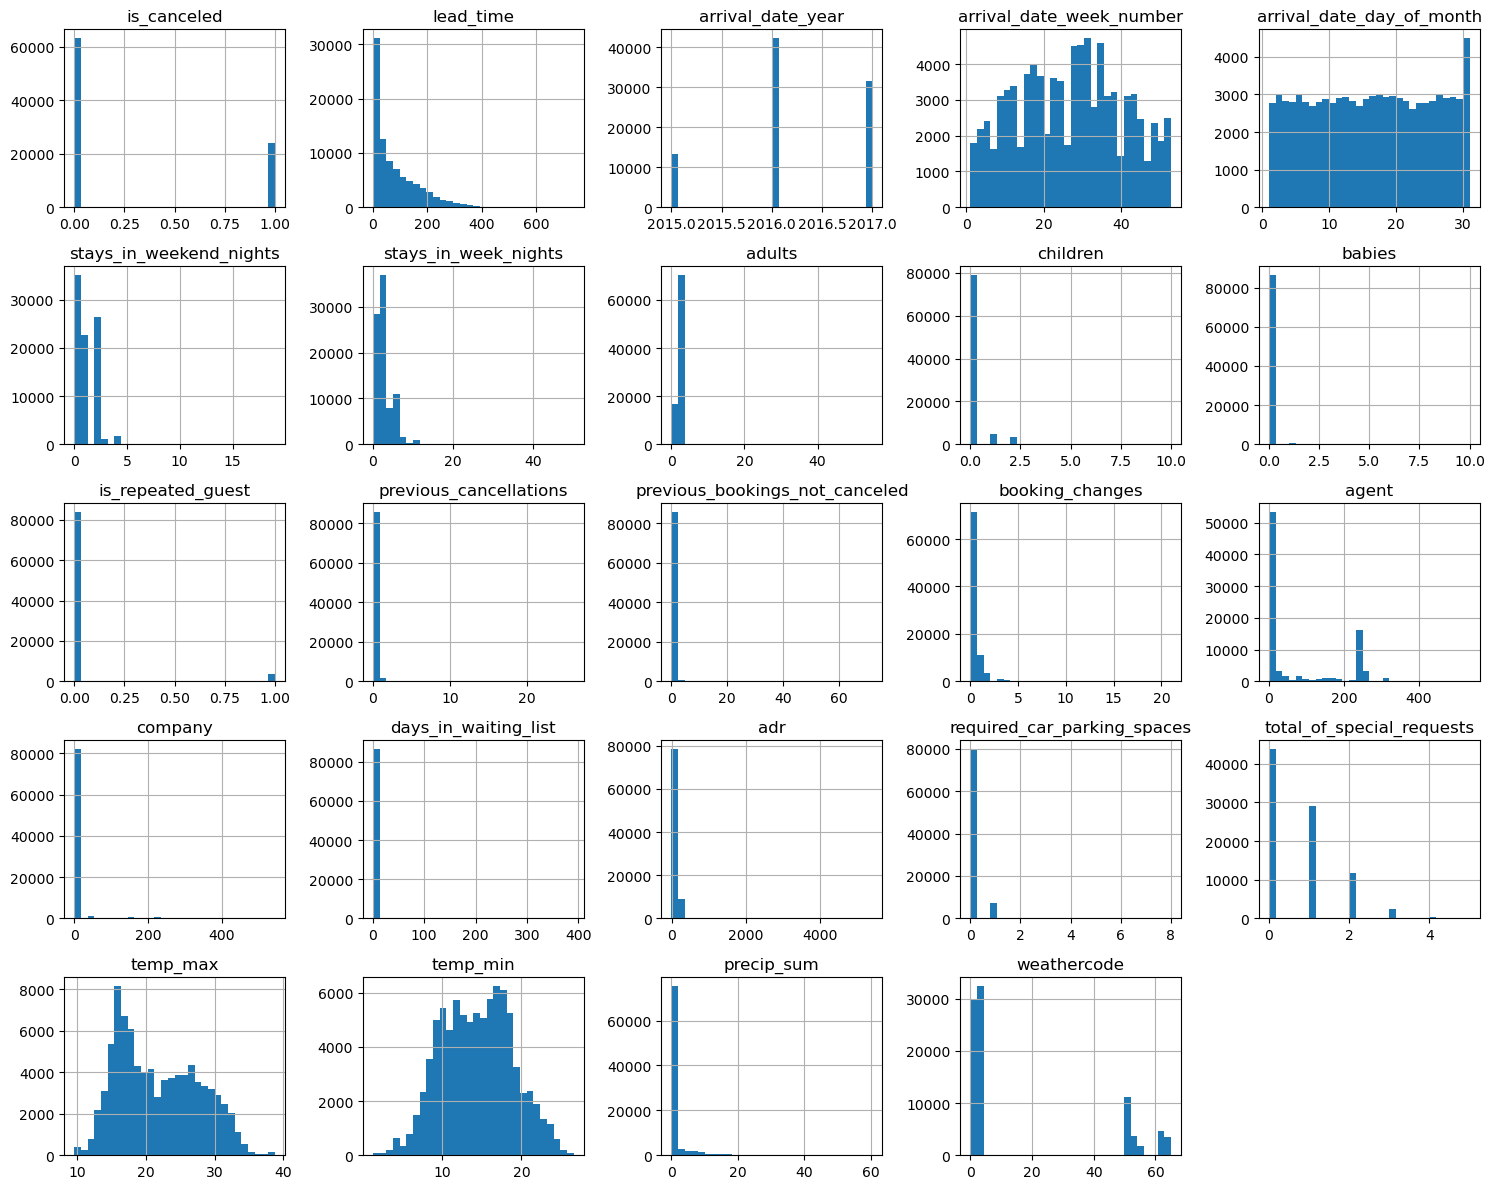

In [28]:
hotel_weather_df[num_cols].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

#### Observations

- lead_time is right skewed implying that most reservations are made within a year of visits. There also must be an outlier with this histogram showing 600 nights of lead time. We may need to investigate outliers further.
- arrival date day of month has a uniform distribution with a strange spike on day 30. Might warrent further investigation to see what is causing that spike.
- temp_max is showing a bimodal distribution, is seems the most common temperatures are lower than 20.
- temp_min has a more normal distribution showing that most min temps are between 10 and 20. 

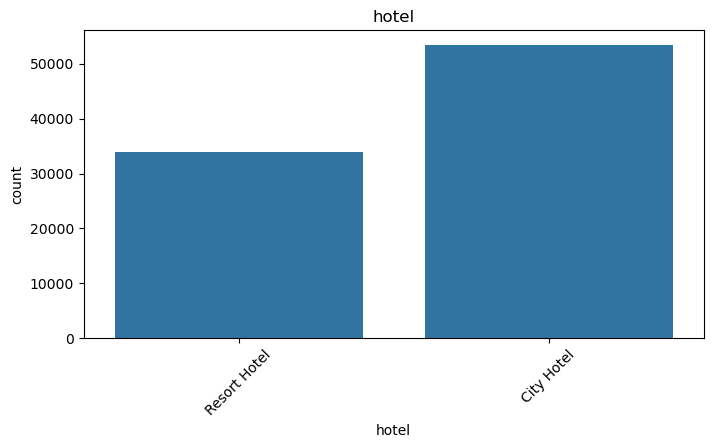

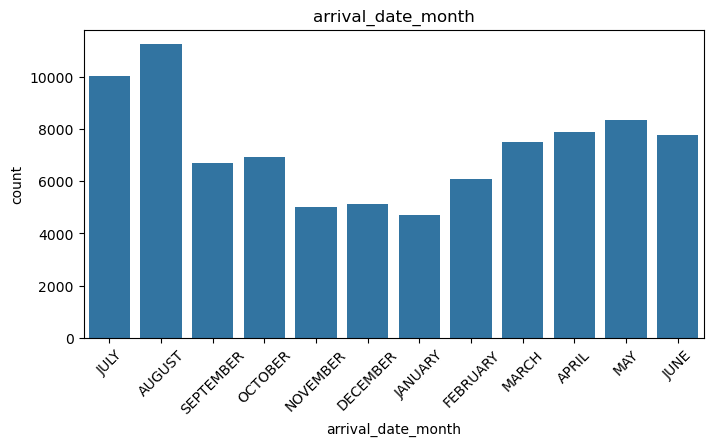

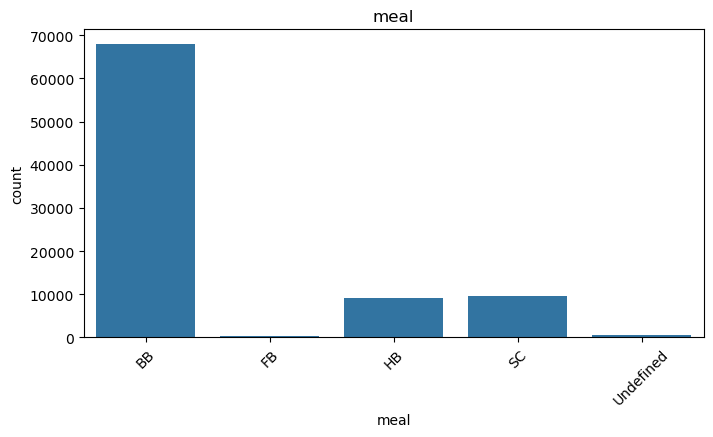

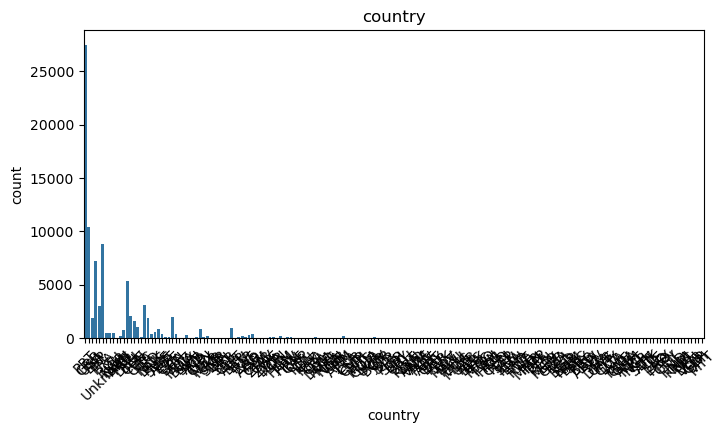

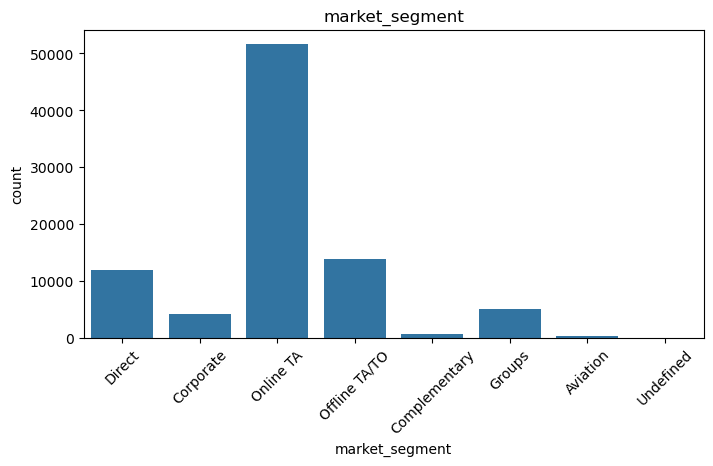

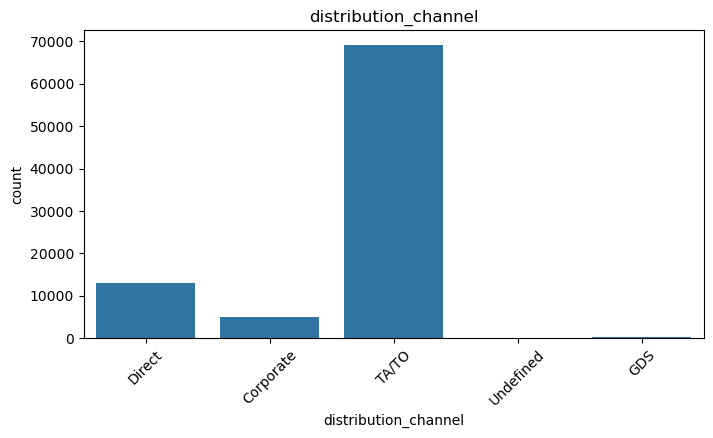

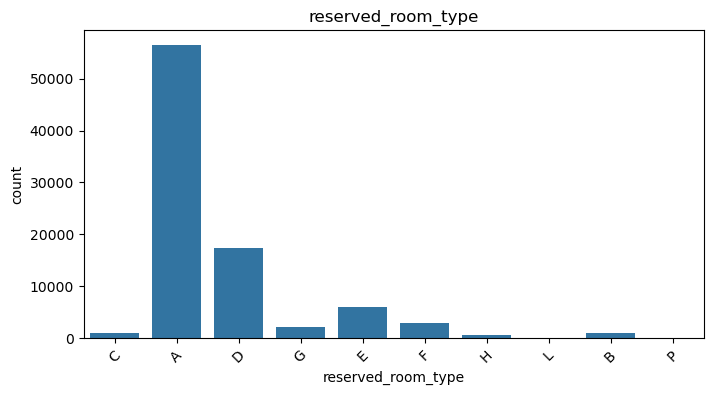

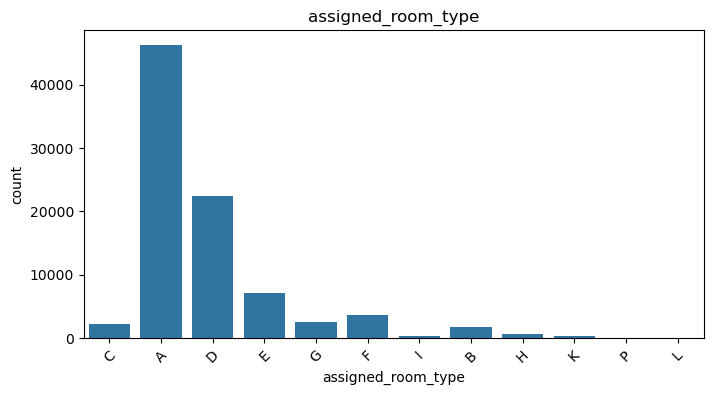

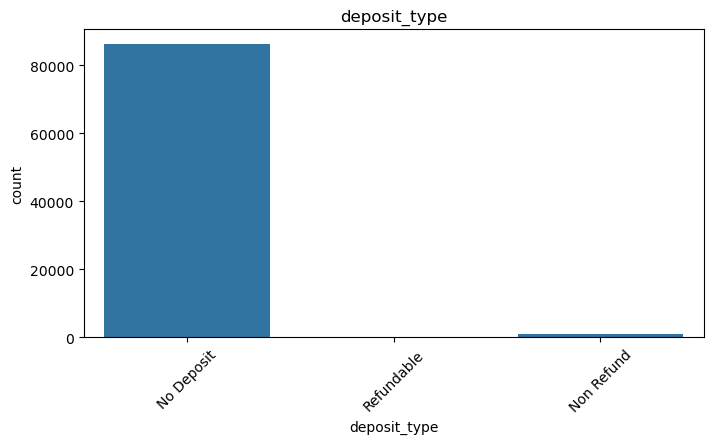

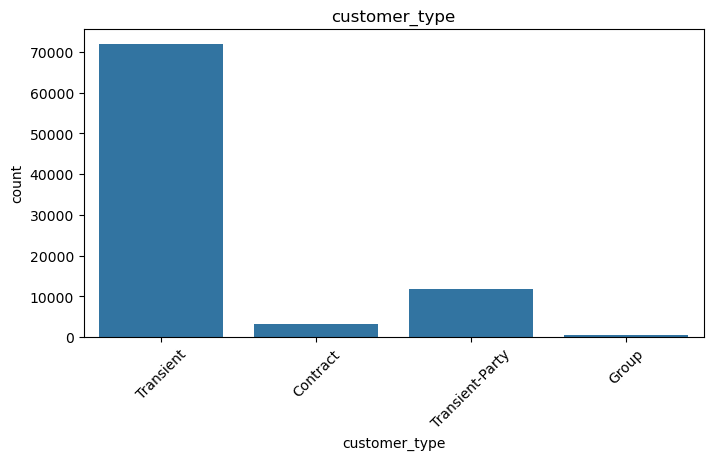

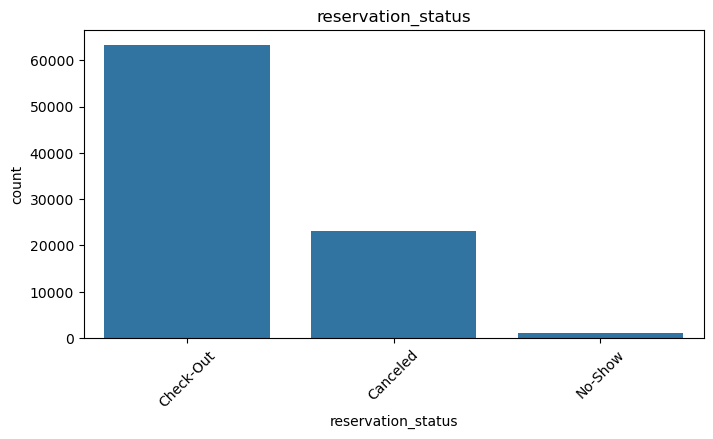

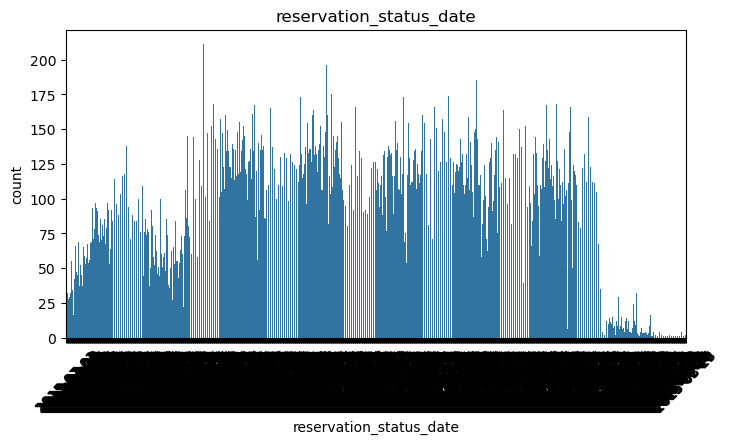

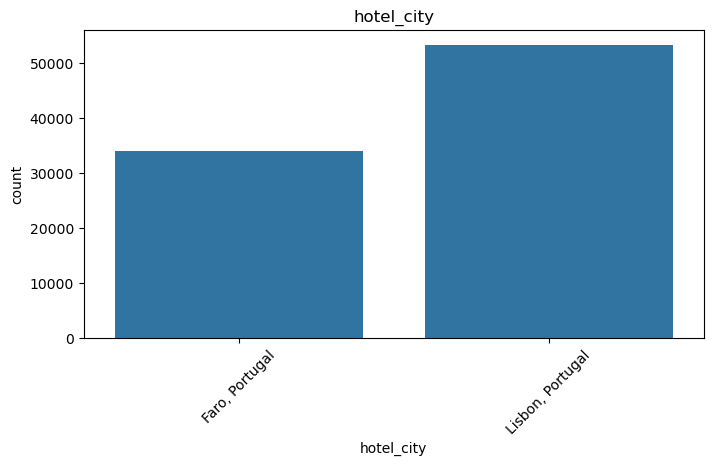

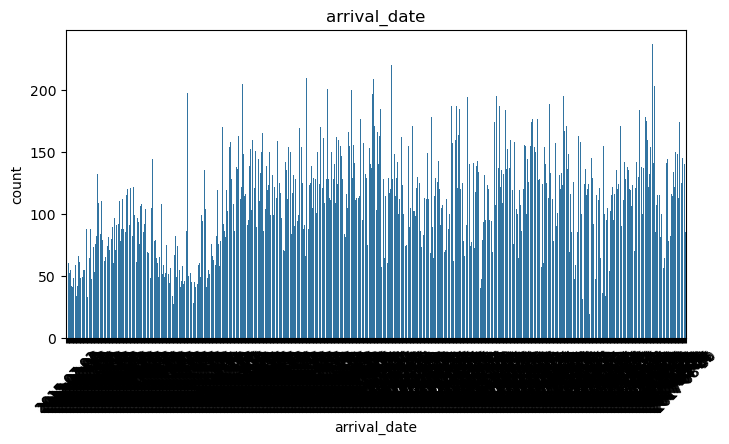

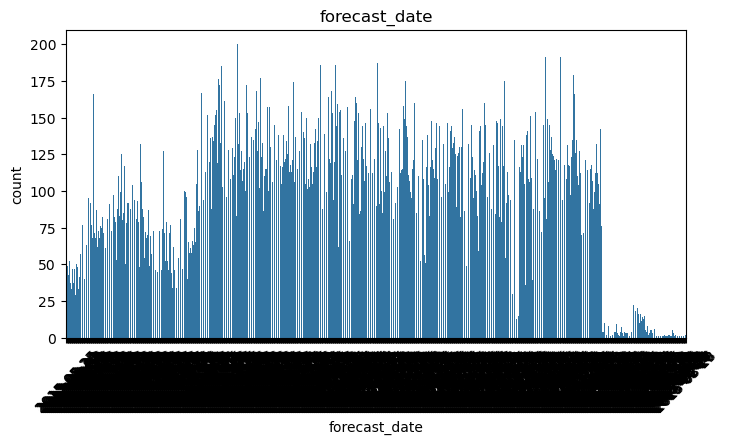

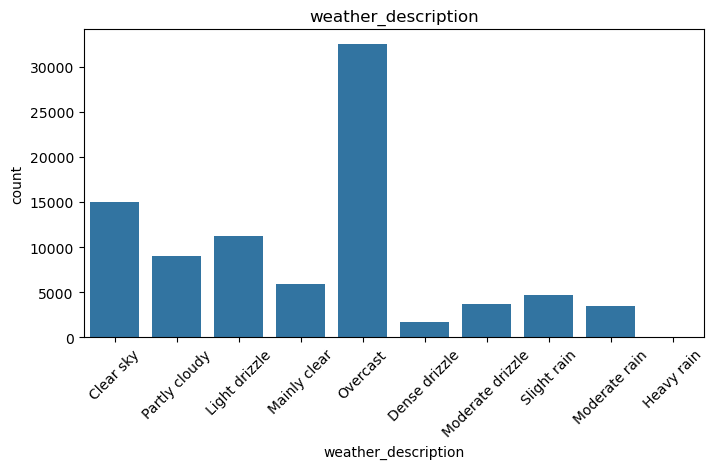

In [39]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=hotel_weather_df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

#### Observations

- August is the most popular arrival month, November through January are the lowest arrival months
- There are many countries that travel to this hotel, the plot is not very useful. We may need a pie chart or different type of plot to better visualize this data.
- Online TA's dominate the reservations far exceeding the Direct, Group, and Corporate segments.
- Nearly all reservations are No Deposit type, with only a very small number as 'non-refund'. Question to investigate - with the objective of this project being a cancellation prediction model, does it make sense to keep or drop the 'non-refund' deposit type? Does it have an effect on cancellations. Logic tells us that a guest to has a non-refundable deposit should be less likely to cancel, does the data support that logic?
- We can see there are over 6000 reservations that are in status 'Check-Out' implying they did not cancel, there are slightly over 2000 cancelled reservations, and less than 500 no-shows
- The most common weather description is Overcast with over 3000 observations

### Visualize features for each hotel and compare

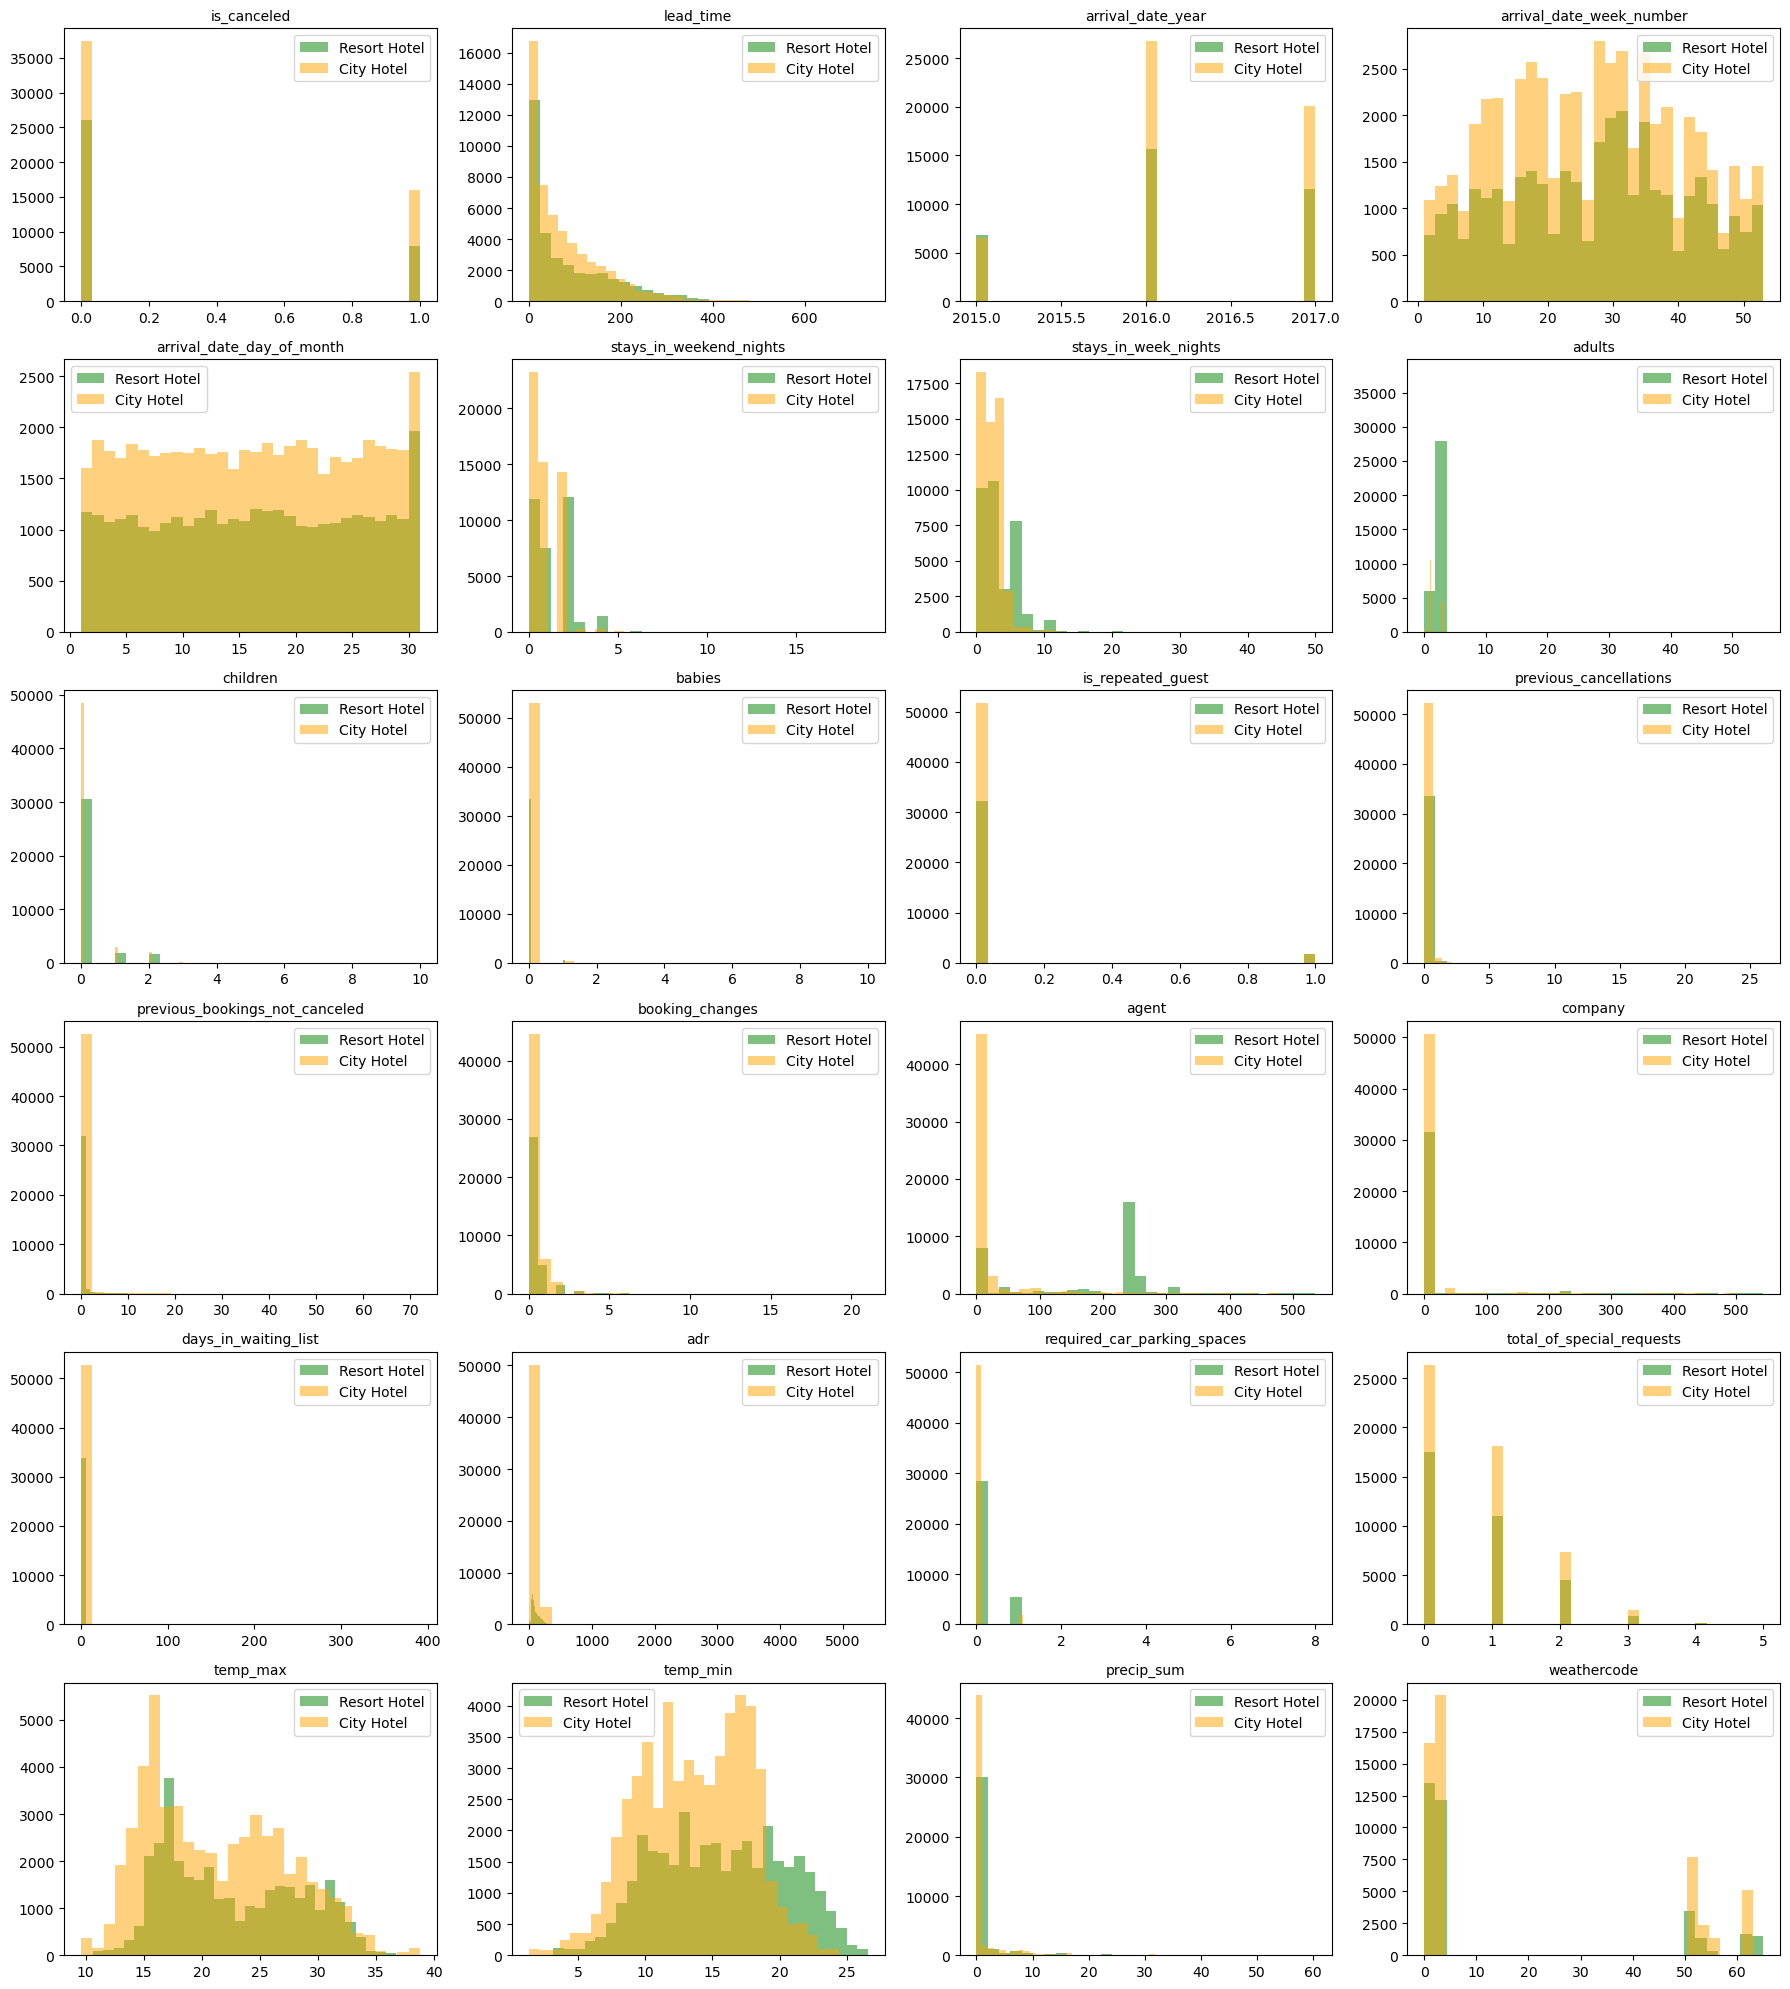

In [56]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(18,20))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(resort_df[col], bins=30, color='green', alpha=0.5, label='Resort Hotel')
    axes[i].hist(city_df[col], bins=30, color='orange', alpha=0.5, label='City Hotel')
    axes[i].set_title(col, fontsize=10)
    axes[i].legend()

plt.tight_layout()
plt.show()

/var/folders/vn/_qrvqjjx1yb4mwjbsrg0tnj80000gn/T/ipykernel_91286/1281004041.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Hotel')


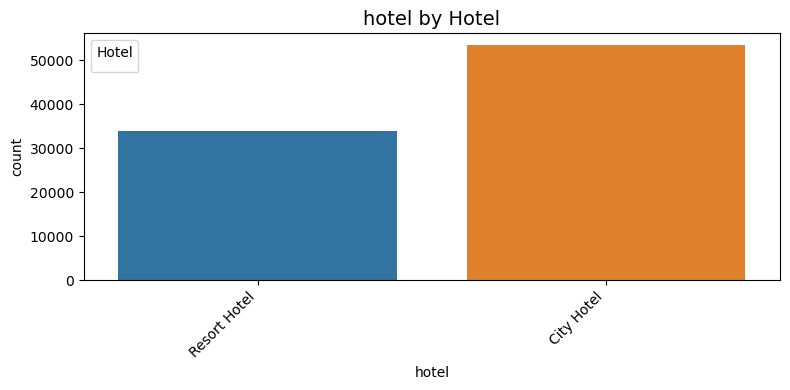

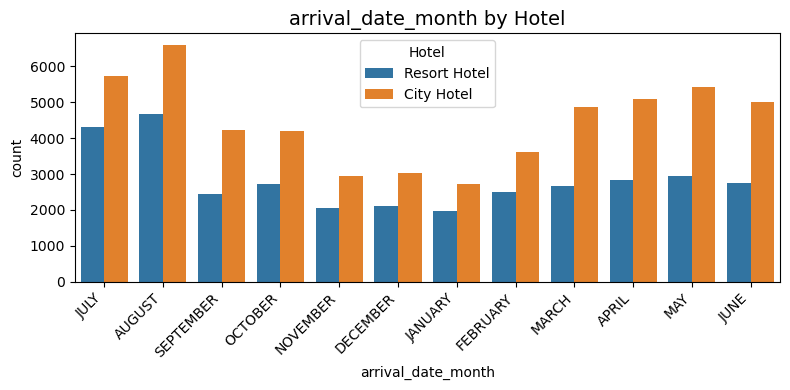

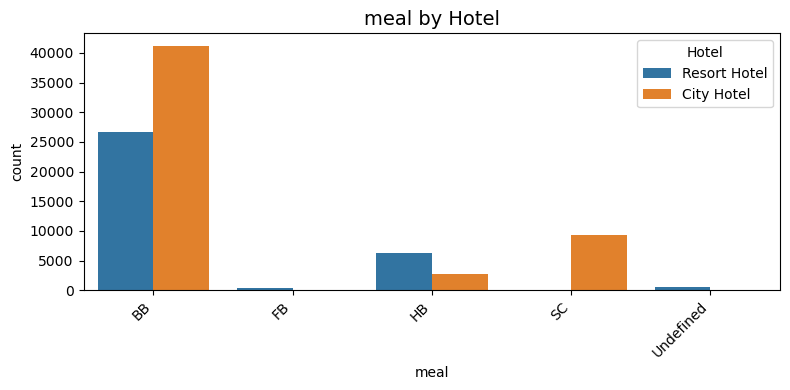

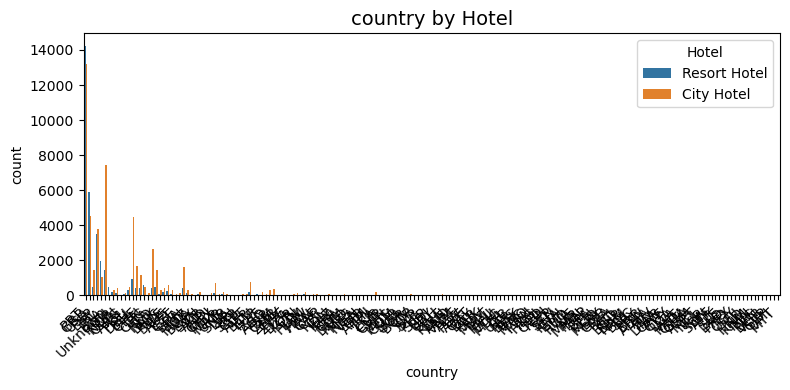

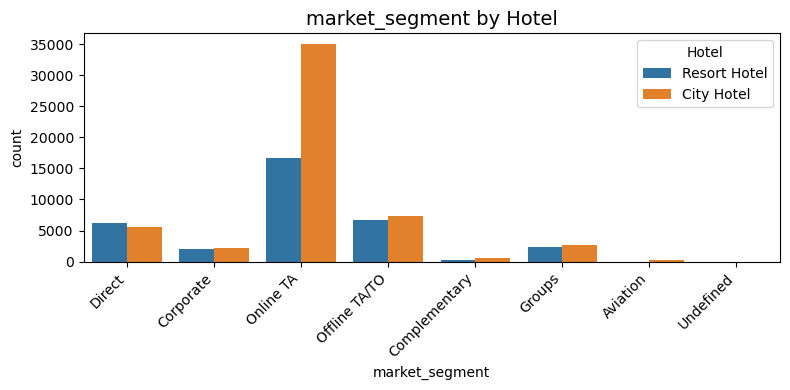

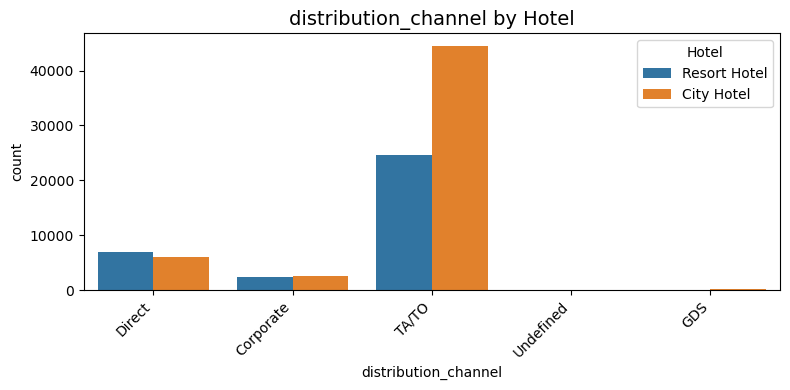

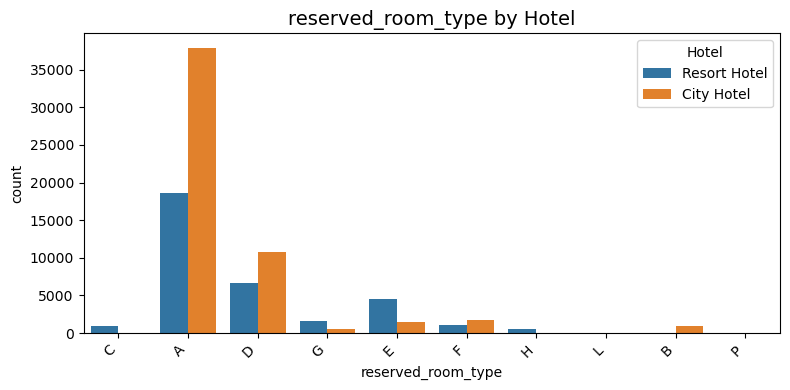

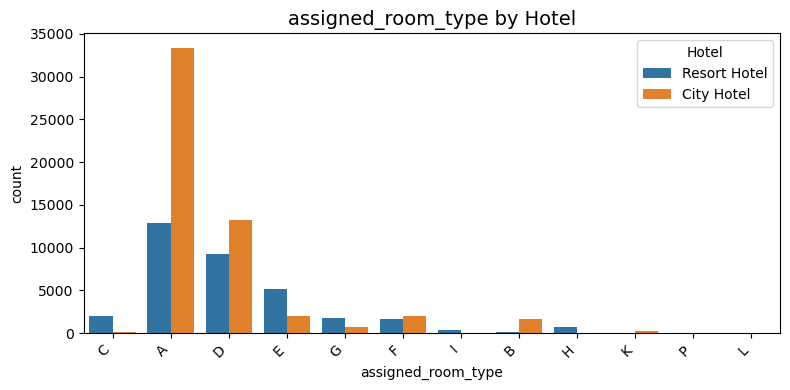

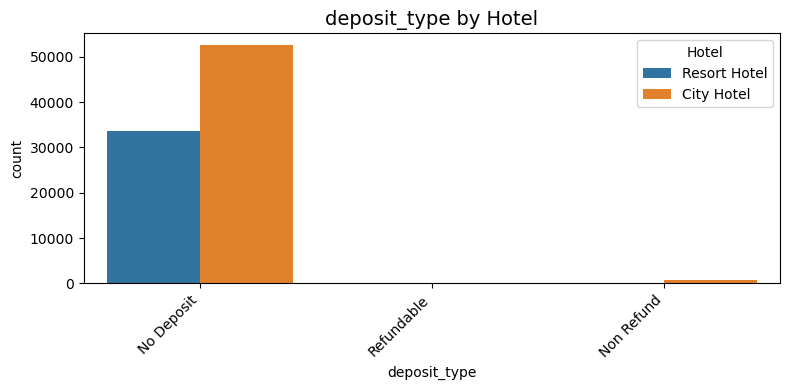

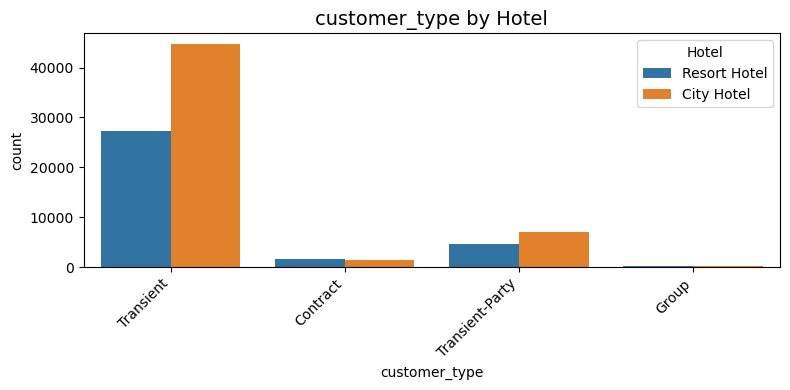

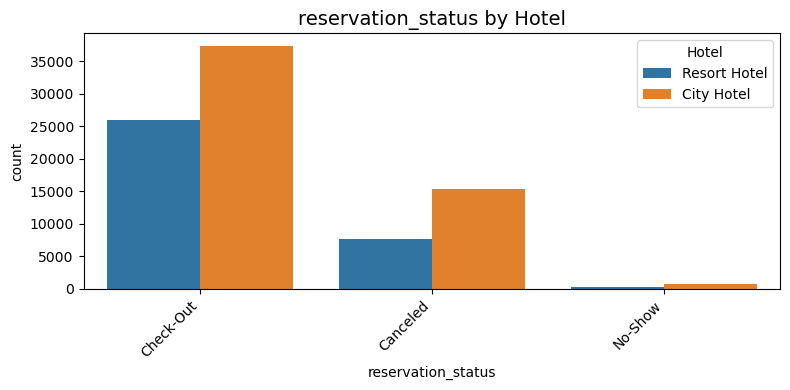

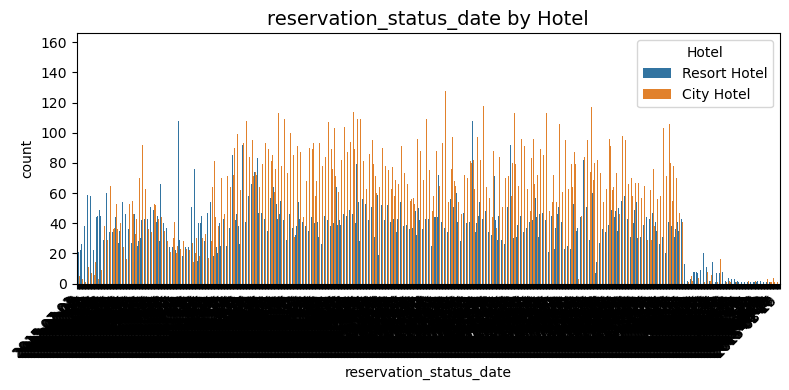

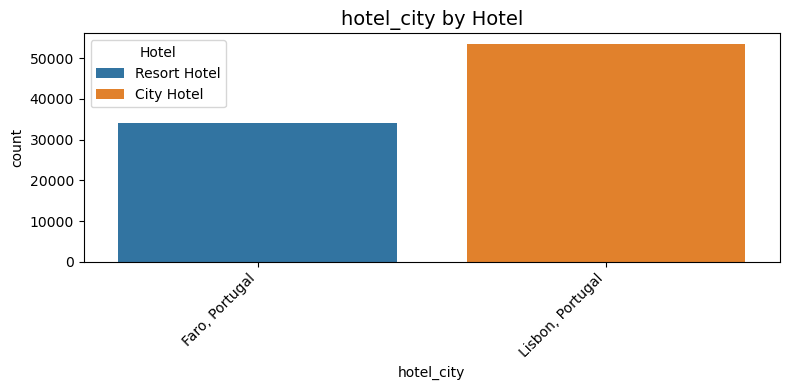

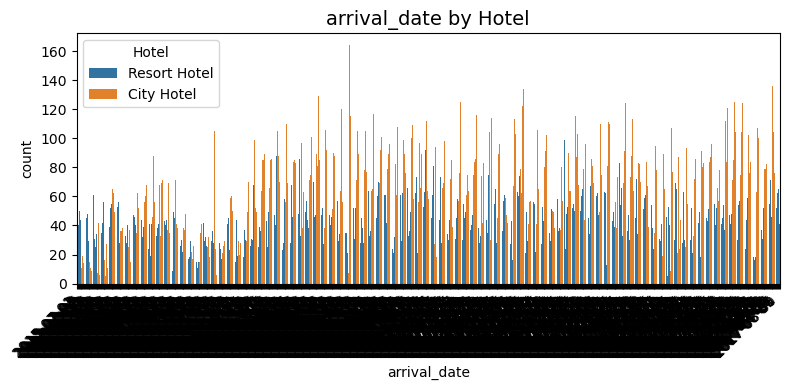

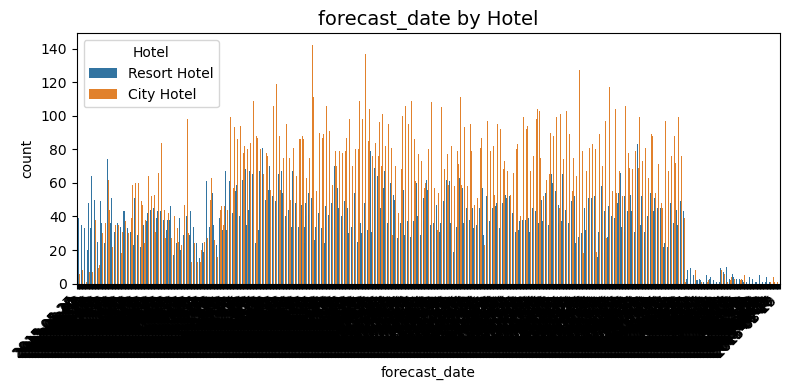

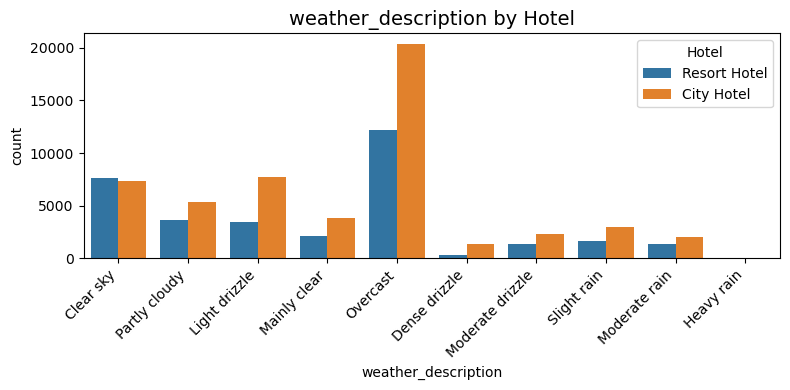

In [55]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=hotel_weather_df, x=col, hue='hotel')
    plt.title(f"{col} by Hotel", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Hotel')
    plt.tight_layout()
    plt.show()

#### Observations

In comparing the visualizations between the two hotels in the dataset we can see that the numerical features are nearly exact matches, and the categorical features are very similar - most show more results for the city hotel, we must keep in mind that there are more records for the city hotel than the resort hotel, so this is expected. From these visualizations we can determine that we can use the total data set to create our model, and do not need to make individual models for each hotel.

## Cancellation Analysis

In this section we will explore how each feature relates to the cancellation data. Since a good amount of our data is currently categorical, we need to convert all to numeric to view on a heatmap.

In [91]:
tmp = hotel_weather_df.copy()

date_cols = ['arrival_date','reservation_status_date','forecast_date']
for c in date_cols:
    if c in tmp.columns:
        tmp[c] = pd.to_datetime(tmp[c], errors='coerce')
        tmp[c] = tmp[c].view('int64') // 10**9

obj_cols = tmp.select_dtypes(include=['object', 'category']).columns.tolist()
for c in obj_cols:
    tmp[c] = pd.Categorical(tmp[c]).codes

tmp['is_canceled'] = pd.to_numeric(tmp['is_canceled'], errors='coerce')

/var/folders/vn/_qrvqjjx1yb4mwjbsrg0tnj80000gn/T/ipykernel_91286/1078090197.py:7: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  tmp[c] = tmp[c].view('int64') // 10**9
/var/folders/vn/_qrvqjjx1yb4mwjbsrg0tnj80000gn/T/ipykernel_91286/1078090197.py:7: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  tmp[c] = tmp[c].view('int64') // 10**9
/var/folders/vn/_qrvqjjx1yb4mwjbsrg0tnj80000gn/T/ipykernel_91286/1078090197.py:7: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  tmp[c] = tmp[c].view('int64') // 10**9


Now that we have a DataFrame, 'tmp', with all features as numeric, we will investigte on a heatmap.

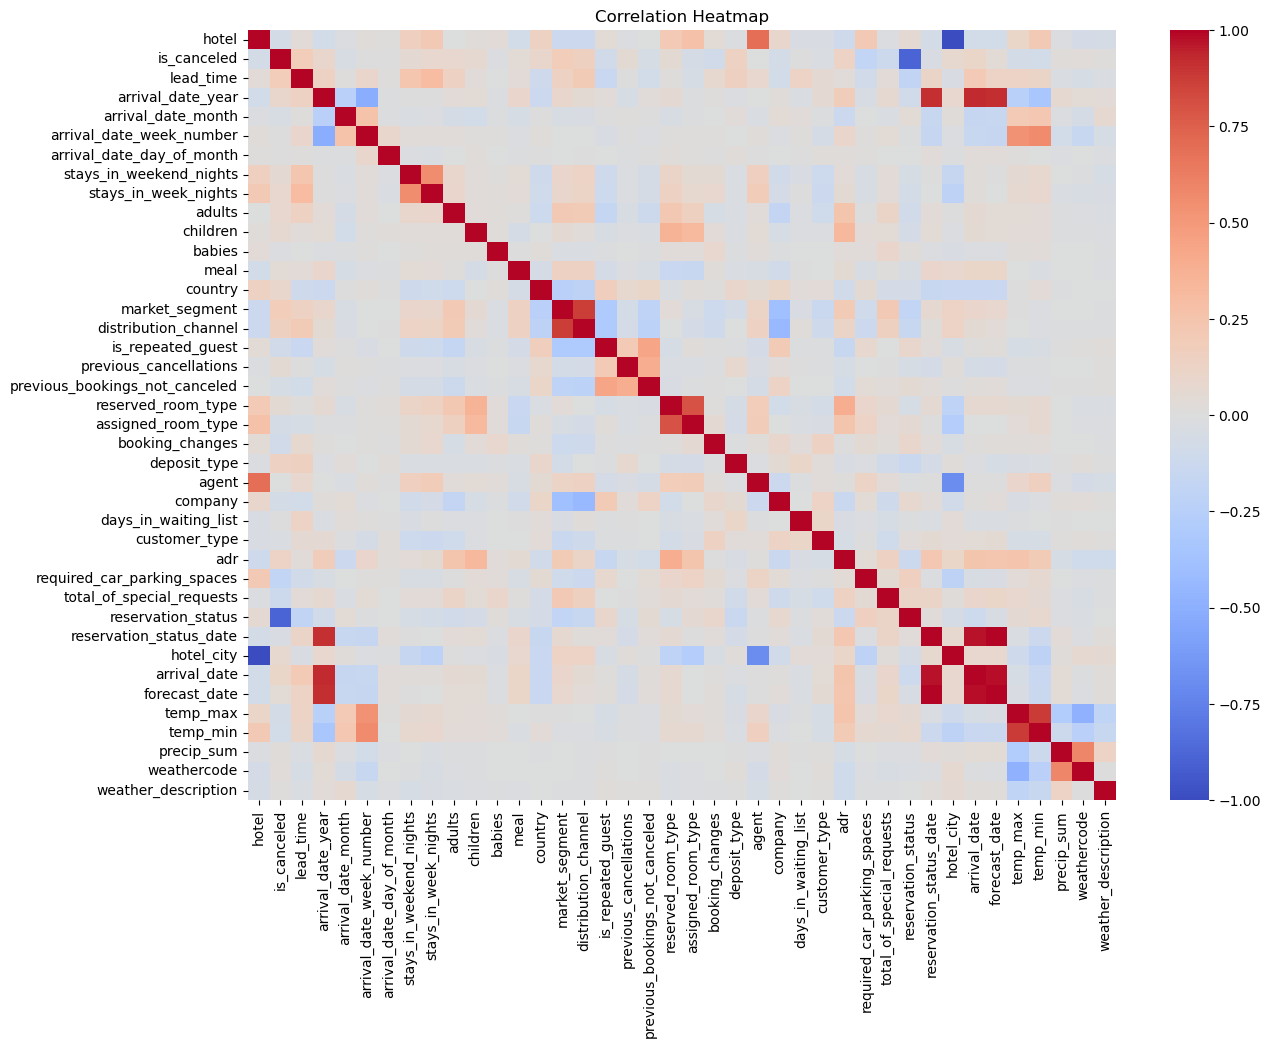

In [92]:
total_corr = tmp.corr()
plt.figure(figsize=(14,10))
sns.heatmap(total_corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

While the heatmap above is a good way to see correlations between each of the features, we need to zoom in on our target of cancellations.

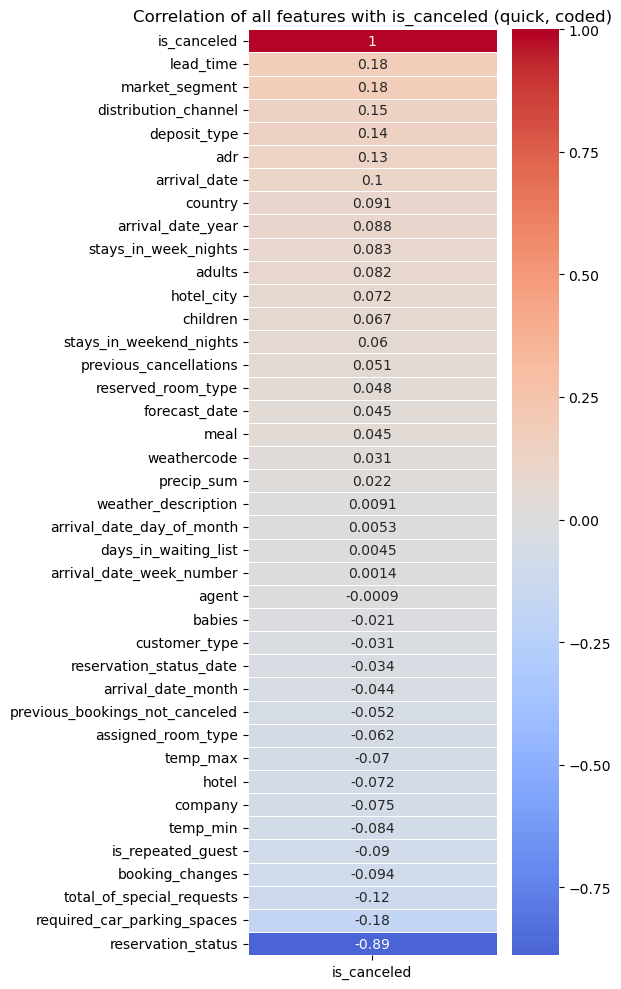

Top positive correlations with is_canceled:
is_canceled                1.000000
lead_time                  0.184806
market_segment             0.181927
distribution_channel       0.150403
deposit_type               0.137545
adr                        0.127986
arrival_date               0.102321
country                    0.091383
arrival_date_year          0.088030
stays_in_week_nights       0.082928
adults                     0.081816
hotel_city                 0.071596
children                   0.067369
stays_in_weekend_nights    0.060191
previous_cancellations     0.051468
reserved_room_type         0.048116
forecast_date              0.045311
meal                       0.045301
weathercode                0.030707
precip_sum                 0.022182
weather_description        0.009114
Name: is_canceled, dtype: float64

Top negative correlations with is_canceled:
assigned_room_type            -0.062174
temp_max                      -0.070499
hotel                         -0.071596
c

In [94]:
corr_with_target = tmp.corr(method='pearson')['is_canceled'].sort_values(ascending=False)

plt.figure(figsize=(6, max(6, 0.25 * len(corr_with_target))))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation of all features with is_canceled (quick, coded)')
plt.tight_layout()
plt.show()


print("Top positive correlations with is_canceled:")
print(corr_with_target.head(21))
print("\nTop negative correlations with is_canceled:")
print(corr_with_target.tail(10))

In [98]:
top_20 = corr_with_target[1:21].index
top_20

Index(['lead_time', 'market_segment', 'distribution_channel', 'deposit_type',
       'adr', 'arrival_date', 'country', 'arrival_date_year',
       'stays_in_week_nights', 'adults', 'hotel_city', 'children',
       'stays_in_weekend_nights', 'previous_cancellations',
       'reserved_room_type', 'forecast_date', 'meal', 'weathercode',
       'precip_sum', 'weather_description'],
      dtype='object')

Above we can see the top 20 positive correlations to cancelled reservations (excluding itself). Surprisingly, weather description is rated number 20, but does show a positive correlation. We will continue to dig deeper into these features and their correlations.

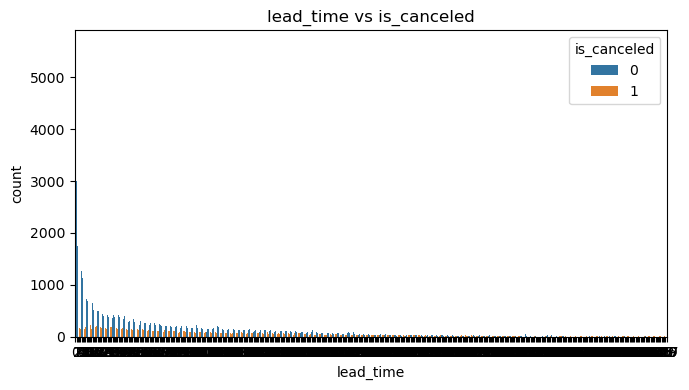

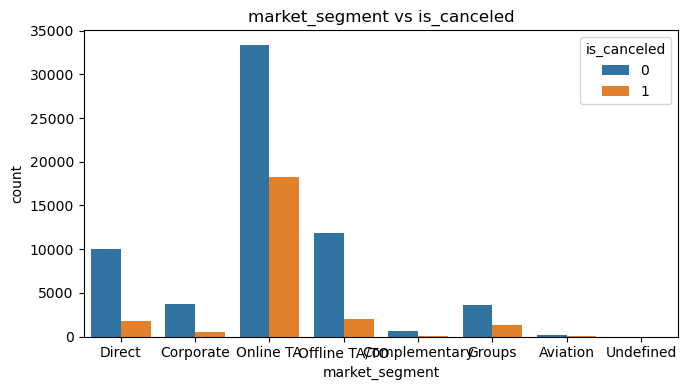

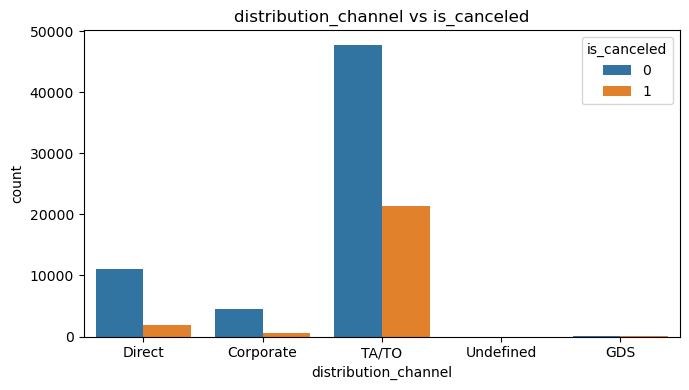

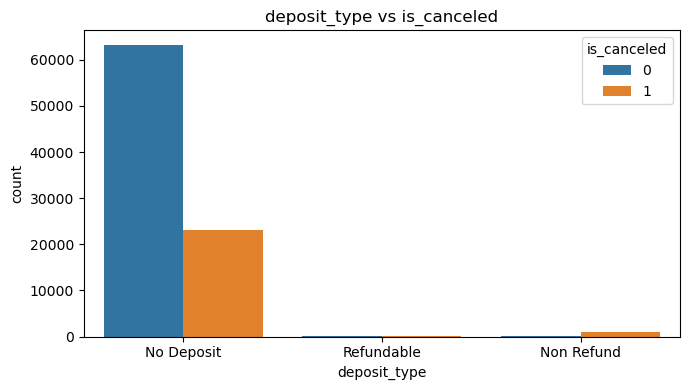

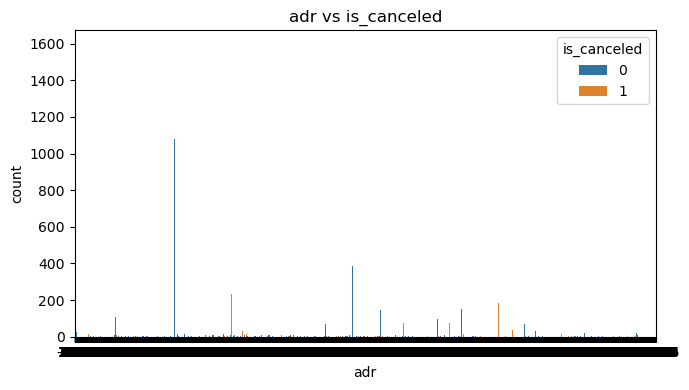

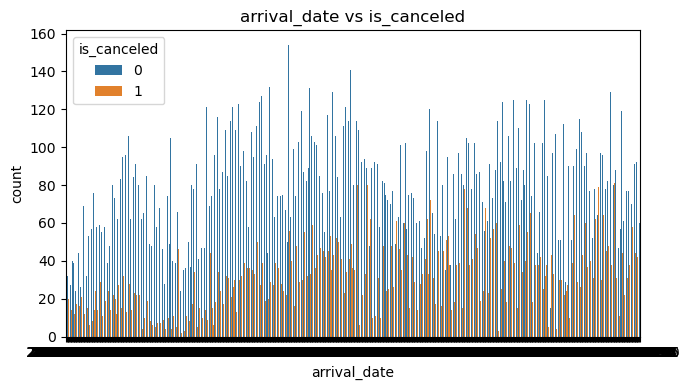

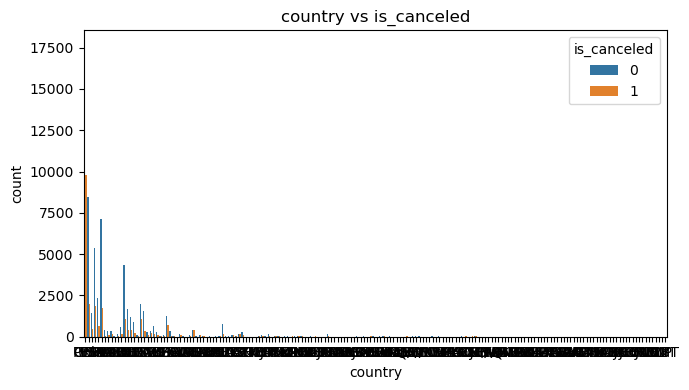

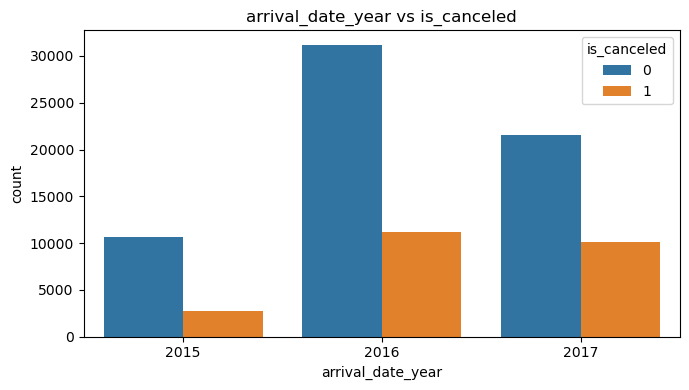

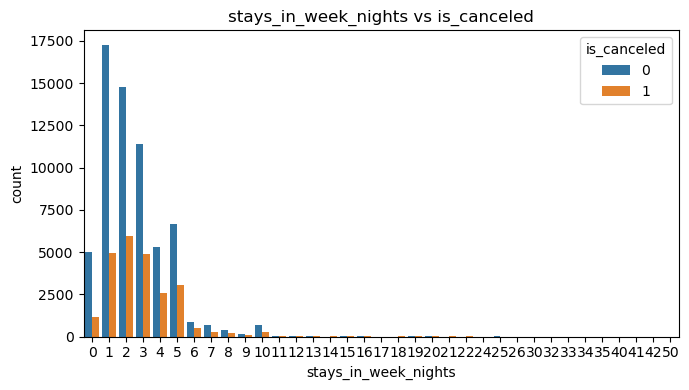

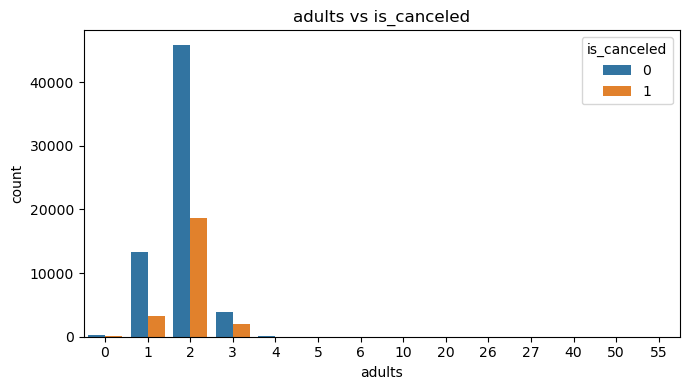

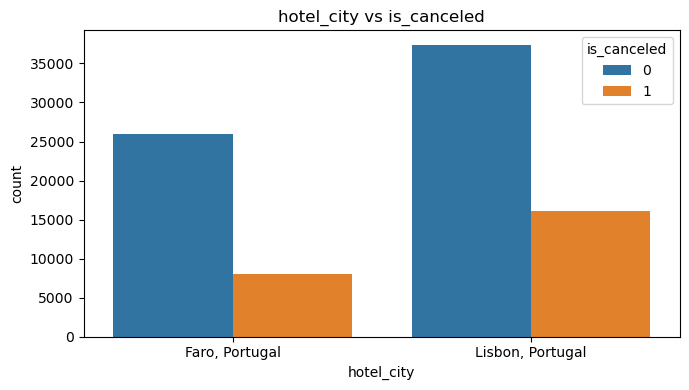

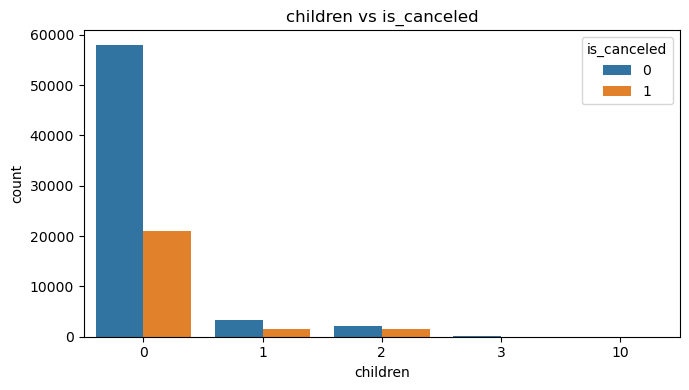

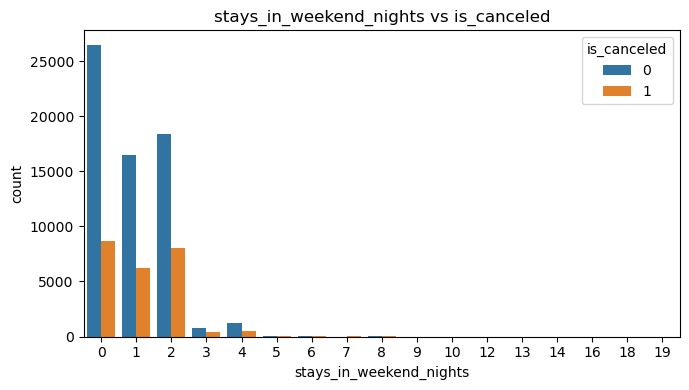

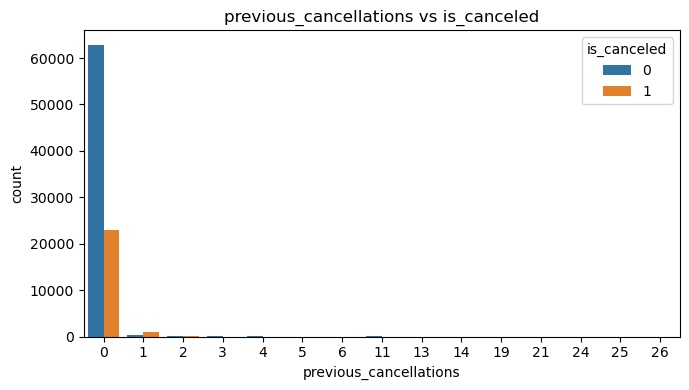

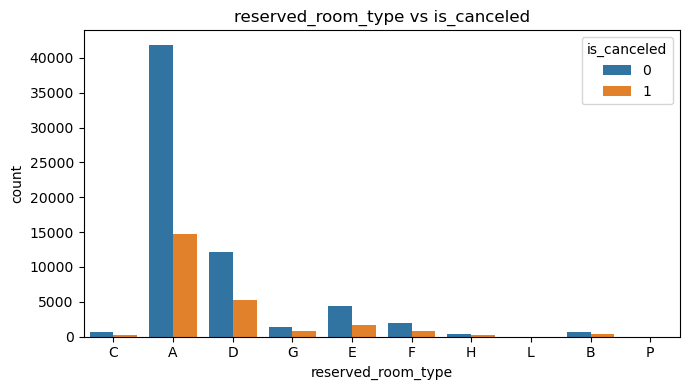

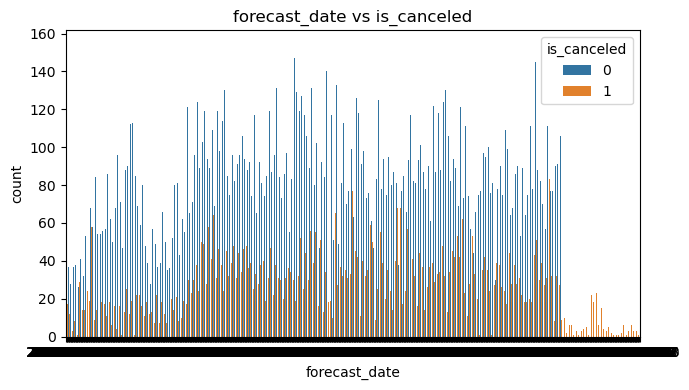

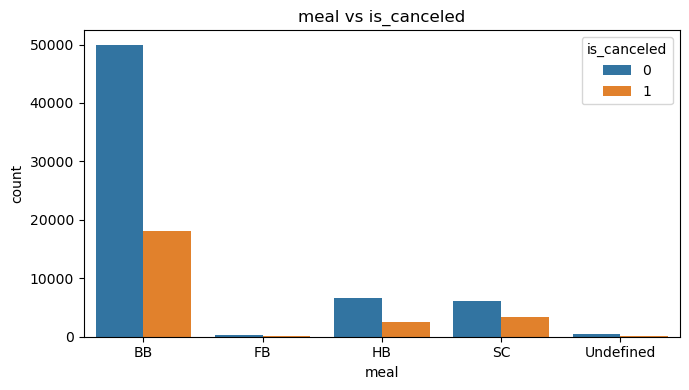

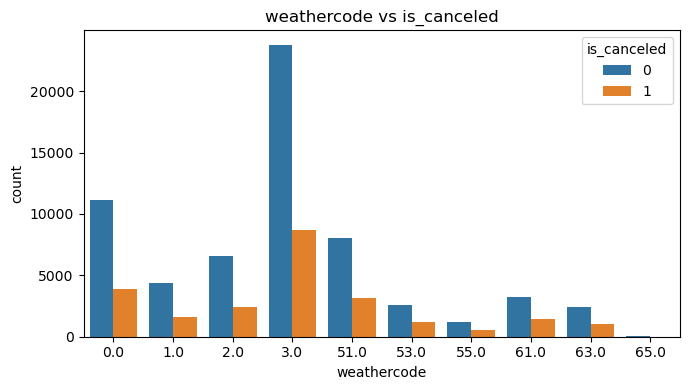

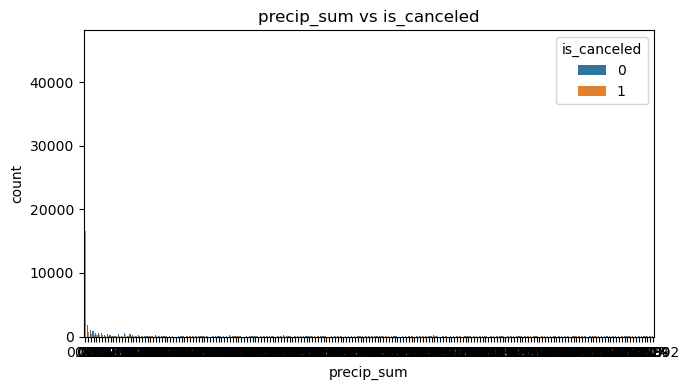

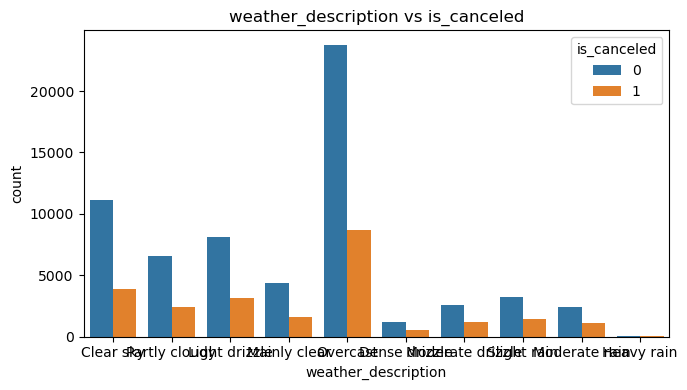

In [106]:
for col in top_20:
    plt.figure(figsize=(7,4))
    sns.countplot(hue='is_canceled', x=col, data=hotel_weather_df)
    plt.title(f'{col} vs is_canceled')
    plt.tight_layout()
    plt.show()

### Statistical Tests

In [111]:
for col in top_20:
    canceled = tmp[tmp['is_canceled'] == 1][col]
    not_canceled = tmp[tmp['is_canceled'] == 0][col]
    t_stat, p_value = ttest_ind(canceled, not_canceled, equal_var=False)
    print(f"{col}: t-stat = {t_stat:.3f}, p-value = {p_value:.5f}")
    print()

lead_time: t-stat = 52.719, p-value = 0.00000

market_segment: t-stat = 61.250, p-value = 0.00000

distribution_channel: t-stat = 52.347, p-value = 0.00000

deposit_type: t-stat = 28.768, p-value = 0.00000

adr: t-stat = 35.050, p-value = 0.00000

arrival_date: t-stat = 30.677, p-value = 0.00000

country: t-stat = 26.890, p-value = 0.00000

arrival_date_year: t-stat = 26.638, p-value = 0.00000

stays_in_week_nights: t-stat = 23.763, p-value = 0.00000

adults: t-stat = 19.743, p-value = 0.00000

hotel_city: t-stat = 21.639, p-value = 0.00000

children: t-stat = 17.947, p-value = 0.00000

stays_in_weekend_nights: t-stat = 17.373, p-value = 0.00000

previous_cancellations: t-stat = 12.129, p-value = 0.00000

reserved_room_type: t-stat = 13.849, p-value = 0.00000

forecast_date: t-stat = 13.674, p-value = 0.00000

meal: t-stat = 12.931, p-value = 0.00000

weathercode: t-stat = 8.942, p-value = 0.00000

precip_sum: t-stat = 6.439, p-value = 0.00000

weather_description: t-stat = 2.709, p-va

Based on the results for the correlation values, t-stats, and p-values, we will keep all 20 features to use in the next steps.

In [113]:
features_to_keep = list(top_20) + ['is_canceled']

hotel_EDA_df = tmp[features_to_keep].copy()

hotel_EDA_df.head()

,lead_time,market_segment,distribution_channel,deposit_type,adr,arrival_date,country,arrival_date_year,stays_in_week_nights,adults,...,children,stays_in_weekend_nights,previous_cancellations,reserved_room_type,forecast_date,meal,weathercode,precip_sum,weather_description,is_canceled
0,342,3,1,0,0.0,1435708800,135,2015,0,2,...,0,0,0,2,1432684800,0,0.0,0.0,0,0
1,737,3,1,0,0.0,1435708800,135,2015,0,2,...,0,0,0,2,1432684800,0,0.0,0.0,0,0
2,7,3,1,0,75.0,1435708800,59,2015,1,1,...,0,0,0,0,1432684800,0,0.0,0.0,0,0
3,13,2,0,0,75.0,1435708800,59,2015,1,1,...,0,0,0,0,1432684800,0,0.0,0.0,0,0
4,14,6,3,0,98.0,1435708800,59,2015,2,2,...,0,0,0,0,1432684800,0,0.0,0.0,0,0


In [114]:
hotel_EDA_df.to_csv('hotel_EDA_df.csv', index=False)